# <font face='arial' color='blue' size=8pt> Classification Problems </font>

For classification we have two broad ideas:



1.   Predict a probability for class belonging given the data and the engineered features (methods include Logistic Regression, k-Nearest Neighbors, Random Forests, Neural Networks).
2.   Predict a descision boundary between classes (Support Vector Machines).



## <font color='navy' size=6.5> Predicting Probabilities </font>

### Binary Classifications
 
 
What we want: classify by using a probability model (an estimate of the odds-ratio) such as a **sigmoid** curve.


IMPORTANT: If we divide two probability values we get an output between 0 and $\infty$ (the infinity is approached when the denominator is very close to 0 and the numerator is very close to 1.

The ***odds-ratio*** is


$$\large
\frac{\text{P}(y_i=1|\text{feature data})}{\text{P}(y_i=0|\text{feature data})}
$$

Classification by a straight line is possible but less desirable (as you can see in the picture.)

The concept of the logistic regression in a multivariate setup is to model the log of the odds ratio as a linear function of the features:

$$\large
\log\left(\frac{\text{P}(y_i=1|\text{feature data})}{\text{P}(y_i=0|\text{feature data})} \right) = \beta_0 + \beta_1 \cdot x_i
$$

where $y_i$ represents the $i-th$ output (classification) and $x_{ij}$ represent the features of the $i-th$ observation.

Intuitive example from Biology if you look at a population of either squirrels or rabbits:
$$\large
\text{P}(y_i=\text{rabbit}|\text{weight}=x_i) + \text{P}(y_i=\text{squirrel}|\text{weight}=x_i) = 1
$$

We get 

$$\large
\text{P}(y_i=\text{rabbit}|\text{weight}=x_i) = \frac{1}{1+e^{-\beta_0-\beta_1 x_i}}
$$

the above function is called the "Logistic Sigmoid" (ref. Thomas Malthus):

$$\large
\text{Logistic Sigmoid}(a)=\text{S}(a):=\frac{e^a}{1+e^a}
$$

Why do we like the logistic sigmoid? One reason is because we can easily tell its derivative:

$$\frac{\partial}{\partial a} \text{S}=\text{S}(a)\cdot(1-\text{S}(a))$$



Here $a$ represents the linear combination of features, such as:

$$
a_i=\sum_{j=1}^{p}\beta_j\cdot x_{ij}
$$

<figure>
<center>
<img src='https://drive.google.com/uc?id=14lFmIPhJwzsefkYeCJaV_yPitZsCn9GB' 
width='600px' />
<figcaption>Types of Estimates for the Odds Ratio</figcaption></center>
</figure>

## The Machine Learning of Logistic Regression - An Intuitive Animation </font>

The main idea is that we approximate the probability of Class 1 by using a logistic sigmoid:

$$\large
p_i\overset{\Delta}{=}\text{P}(y_i=1|\text{weight}=x_i) = \frac{1}{1+e^{-\beta_0-x_i\cdot \beta}}
$$

The machine is updating the weights $\beta$ by using the gradient of the following objective function:

$$\large
\text{Loss}(\beta_0,\beta)\overset{\Delta}{=}-\frac{1}{n}\sum_{i=1}^{n}\left[y_i\cdot\text{log}( p_i) + (1-y_i)\cdot \text{log}(1-p_i)\right]
$$


<figure>
<center>
<img src='https://drive.google.com/uc?id=11nNrxrxSqC7uUKTUIf1YFrzVSgDOzHeQ' 
width='800px' />
<figcaption>Different types of Odds Ratio estimates</figcaption></center>
</figure>



### Animation Example for Logistic Regression

In [ ]:
!pip install -q celluloid

In [1]:
# Setup: 
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import celluloid
from celluloid import Camera
from scipy.special import expit
from matplotlib import gridspec

In [ ]:
# Define logistic regression model: 
class LogisticRegression(object):
    def __init__(self,x,y, lr=0.01):
        self.lr=lr
        n=x.shape[1] # determine the number of independent variables
        self.w=np.ones((1,n))*(0) # initialize weight matrix and set weights to zero    
        self.b=0.5 # set starting value for b to 0.5 
        
    def predict(self,x): # returns prediction
        z=x@self.w.T  + self.b   # @: matrix multiplication 
        p=expit(z)  # logistic sigmoid function
        return p

    def cost(self, x,y): #cost function
        z=x@self.w.T  + self.b
        p=expit(z)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p)) #Cross-entropy cost function
    
    def step(self,x,y):
        z=x@self.w.T  + self.b
        p=expit(z)
    
        # Partial derivatives:       
        dw= np.mean((p - y)*x, axis=0)    # dJ/dw
        db = np.mean(p-y)               # dJ/db
        self.w = self.w - dw*self.lr # update w
        self.b= self.b- db*self.lr  # update b
        
    def fit(self,x,y,numberOfEpochs=100000):
        # Create arrays to store weights, biases, costs, predicted y-values for plots..
            #... and predicted y-values for connection lines in: 
        self.AllWeights=np.zeros((numberOfEpochs, x.shape[1]))
        self.AllBiases=np.zeros((numberOfEpochs, x.shape[1]))
        self.AllCosts=np.zeros((numberOfEpochs, x.shape[1]))
        self.All_cl= np.zeros((numberOfEpochs,len(x))) # cl: # predicted y-values for connection lines
        
        for step in range(numberOfEpochs):
            # for each step of gradient descent assign new parameter value to respective array element: 
            self.AllWeights[step]=self.w  
            self.AllBiases[step]=self.b
            self.AllCosts[step]=self.cost(x,y)
            self.All_cl[step]=(self.predict(x)).T.flatten() 
            self.step(x,y) # update parameter values

In [ ]:
# Introduce training data:  
x_train = np.array([
    [-8.3],
    [-7.1],
    [-4.9],
    [-3.9],
    [-2.7],
    [-1.5],
    [-.9],
    [1.2],
    [2.5],
    [3.6],
    [5.2],
    [6.5],
    [7.8],
    [9.0],
    [9.9],
    [11.2]
])

y_train = np.array([
    [0],
    [0],
    [0],
    [0],
    [0],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [0],
    [1],
    [1],
    [1],
    [1]
])

In [ ]:
xs=np.array([np.linspace(-10,12)]) # x-values later used for regression curve plot

# Fit model to training data: 
model=LogisticRegression(x_train,y_train, lr=0.01) # set up model and define learning rate
model.fit(x_train,y_train, numberOfEpochs=60000) # set number of epochs

# Store parameter values in new variables:    
w=model.AllWeights.T
b= model.AllBiases
c=model.AllCosts
cl=model.All_cl

# Print results: 
print("Final weight: "+ str(float(model.w))) 
print("Final bias: "+ str(model.b))
print("Final costs: " + str(model.cost(x_train,y_train)))

Final weight: 0.3577707045843588
Final bias: -1.11812276174552
Final costs: 0.40028278018174146


In [ ]:

# cross-check results with sklearn's inbuilt logistic regression model: 
from sklearn.linear_model import LogisticRegression as LogReg
# - set C (= Inverse of regularization strength) to a very high number
# - use np.ravel() to prevent DataConversionWarning
clf = LogReg(solver="lbfgs", random_state=0, C = 1e20).fit(x_train, y_train.ravel())
print(clf.coef_, clf.intercept_)

pred=expit(x_train @ clf.coef_.T + clf.intercept_) # calculate respective costs ...
#... for sklearn's fitted model parameters
print(- np.mean(y_train*np.log(pred) + (1-y_train)*np.log(1-pred)))

[[0.35777065]] [-1.11812256]
0.40028278018174496


<ipython-input-51-8479c75b1801>:60: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout() # adjusts subplots to figure area


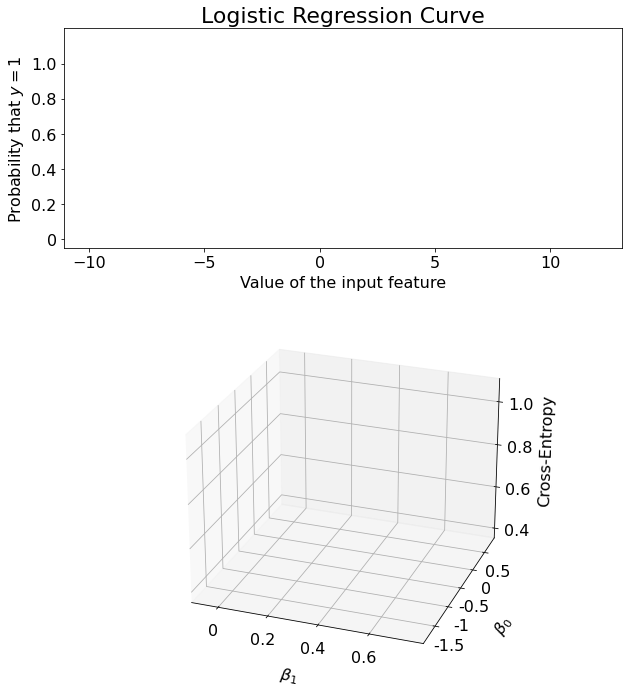

In [ ]:
# Regression curve
def pred_curve(xs,w0,b0):  # predict y-values for regression curve
    z=xs.T@w0.T  + b0   
    p=expit(z)  
    return p

# Create data for surface plot: 
def CrossEntropy_cost(x,y,w0,b0):  # returns costs for every pair of w and b. 
        p=expit(x @ w0.T + b0)
        return - np.mean(y*np.log(p) + (1-y)*np.log(1-p))

ws = np.linspace(-0.05, 0.75, 40) # set range of values for w ... 
bs = np.linspace(-1.75, 0.75, 40)  # ... and b for surface plot
M, B = np.meshgrid(ws, bs) # create meshgrid for surface plot
zs = np.array([CrossEntropy_cost(x_train,y_train,       # determine costs for each pair of w and b 
                       np.array([[wp]]), np.array([[bp]]))  # CrossEntropy_cost() only accepts wp and bp as matrices. 
               for wp, bp in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape) # get z-values for surface plot in shape of M.

# Define which epochs to plot: 
a1=np.arange(0,20,1).tolist() 
a2=np.arange(20,100,10).tolist()
a3=np.arange(100,500,100).tolist()
a4=np.arange(500,15000,100).tolist()
#a5=np.arange(40000,60000,20000).tolist()
points_ = a1+a2+a3+a4#+a5

# Create first animation (regression curve & surface plot):
fig = plt.figure(figsize=(10,12)) # create figure
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 1.7]) # set height ratios of subplots

label_font_size = 16 # size of label fonts
tick_label_size= 16 # size of tick labels

# Customize subplots: 
ax0=fig.add_subplot(gs[0]) # add first subplot to figure
ax0.set_title("Logistic Regression Curve", fontsize=22) #set title
ax0.tick_params(axis='both', which='major', labelsize=tick_label_size) # set tick label size
ax0.set_xlabel("Value of the input feature", fontsize=label_font_size, labelpad=5) # set axis labels
ax0.set_ylabel("Probability that $y=1$", fontsize=label_font_size, labelpad=5)
ax0.tick_params(axis='both', which='major',
                labelsize=tick_label_size) 
ax0.set_ylim([-0.05, 1.2]) # set range for y-values in the plot
ax0.set_yticks([0,0.2,0.4,0.6,0.8, 1]) # set y-axis ticks
ax0.set_yticklabels(["0","0.2","0.4","0.6","0.8", "1.0"], # label y-ticks
                    fontsize=tick_label_size)
ax1=fig.add_subplot(gs[1], projection="3d") # add second subplot 
ax1.view_init(elev=25, azim=-70) # set view
ax1.set_xlabel("$\\beta_1$", fontsize=label_font_size, labelpad=16) 
ax1.set_ylabel("$\\beta_0$", fontsize=label_font_size, labelpad=16)
ax1.set_zlabel("Cross-Entropy", fontsize=label_font_size, labelpad=13)  
ax1.tick_params(axis='both', which='major', labelsize=tick_label_size) 
ax1.set_xticks([0, 0.2,0.4,0.6]) 
ax1.set_xticklabels(["0", "0.2","0.4","0.6"], fontsize=tick_label_size)
ax1.set_yticks([-1.5,-1, -0.5,0,0.5]) 
ax1.set_yticklabels(["-1.5","-1", "-0.5","0","0.5"], fontsize=tick_label_size)
ax1.set_zticks([0.4,0.6, 0.8,1.0]) 
ax1.set_zticklabels(["0.4","0.6", "0.8","1.0"], fontsize=tick_label_size)
ax1.tick_params(axis='z', pad=7, which='major', labelsize=tick_label_size) 
plt.tight_layout() # adjusts subplots to figure area

camera = Camera(fig)  # create camera 
for i in points_:
    
    # Plot logistic regression curve: 
    ys = pred_curve(xs,np.array([w.flatten()[i]]),b.flatten()[i]) #calculate y-values for reg. curve
    leg=ax0.plot(xs.flatten(),ys.flatten(),
                 color='r', label=str(i),lw=2,alpha=1)
    
    # Scatter plot of training data:
    ax0.scatter(x_train, y_train, color='b',marker='x', s=90) # plot training data points
    ax0.legend(leg,[f'costs: {np.round(c.flatten()[i],3)}'], # customize legend
               loc='upper left', fontsize=18)
    
    # Plot connecting lines (between predicted y-values and training data points):
    cl_=cl[i]
    for j in range(len(y_train)):    
        x,y = [x_train[j],x_train[j]],[float(y_train[j]),cl_[j]]
        ax0.scatter(x,y, color='black',s=0.5)
        ax0.plot(x,y, color='black', linewidth=1.5, 
                 linestyle='dashed', alpha=0.4)
        
    # Surface plot of costs:
    ax1.plot_surface(M, B, Z, rstride=1, cstride=1, 
                     alpha=0.80,cmap=cm.coolwarm) 
    
    # Plot trajectory of gradient descent:
    ax1.plot(w.flatten()[0:i],b.flatten()[0:i], 
             c.flatten()[0:i], linestyle="dashed",
             linewidth=2.5, color="black")
    ax1.scatter(w.flatten()[i],b.flatten()[i],   
                c.flatten()[i], marker="o",s=70*2, color="black")
    
    # Customize legend: 
    ax1.legend(leg,[f'iterations: {i}'], 
               loc='upper left', fontsize=18)
    
    camera.snap() # take snapshot after each frame/iteration
    
# Create animation: 
animation = camera.animate(interval = 500, # set delay between frames in milliseconds.
                          repeat = False, repeat_delay = 0) 

#print("Final weights: "+ str(w.flatten()[i]))    # 0.03579113198262307
#print("Final bias: "+ str(b[i]))                 # [-1.11258967]
#print("Final costs: " + str(c[i]))               # [0.40058369]

In [ ]:
animation.save('LogisticRegression_Ex_1D.gif',writer='ffmpeg',fps=20,dpi=200)

### Probability Estimates for Multiclass Problems

The most commonly used is the Softmax approach. References and good examples:

https://deepnotes.io/softmax-crossentropy

https://stackabuse.com/creating-a-neural-network-from-scratch-in-python-multi-class-classification/


## <font color='navy' size=6.5> Class Imbalanced Classifications </font>

Good example: https://www.tensorflow.org/tutorials/structured_data/imbalanced_data


A classification problem with K different classes has a class imbalance if the train data for one or more classes is significantly less than $\frac{n}{K}\times 100\%.$. 

- Resampling techniques
- Plausable fictitious data: Synthetic Minority Oversampling (SMOTE), Adaptive Synthetic Oversampling (ADASYN)
- Approximations of multivariate joint probability distributions.

## <font color='navy' size=6.5> Synthetic Minority Oversampling (SMOTE)

### Setup

In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
# from sklearnex import patch_sklearn
# patch_sklearn()
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report as CR, confusion_matrix
import warnings
warnings.simplefilter(action='ignore')

In [2]:
# define dataset
X, y = make_classification(n_samples=5000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.95], flip_y=0, random_state=1)

In [4]:
counter = Counter(y)
print(counter)

Counter({np.int64(0): 4750, np.int64(1): 250})


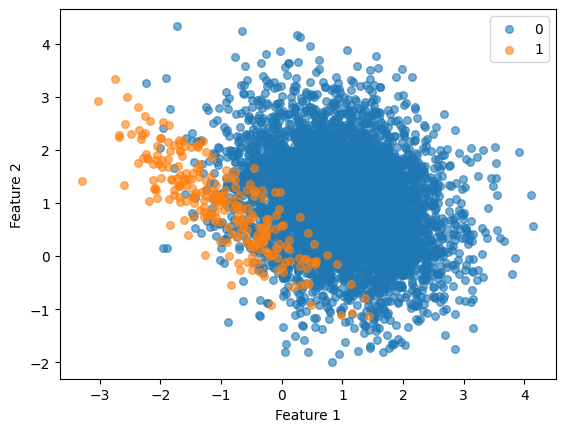

In [5]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label),alpha=0.6,s=30)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [7]:
model = LogisticRegression(C=1000)
model.fit(X,y)

LogisticRegression(C=1000)

In [9]:
cm = confusion_matrix(y,model.predict(X))

In [10]:
pd.DataFrame(cm,index = ['0','1'],columns=['0','1'])

,0,1
0,4701,49
1,130,120


In [12]:
# odds-ratio
np.log(95/5)

np.float64(2.9444389791664403)

In [13]:
# how about using the number of observations from each class when we train Logistic Regression
# we want to sample 250 random individuals from the majority class - we can implement this taks by using the index
ind_majority = np.where(y==0)

In [16]:
np.random.seed(1234)
ind = np.random.choice(np.array(ind_majority).ravel(),sum(y==1),replace=False)

In [19]:
x_small = np.row_stack([X[ind],X[y==1]])

In [22]:
y_small = np.concatenate([np.zeros(sum(y==1)),np.ones(sum(y==1))])

In [24]:
model = LogisticRegression(C=1000)
model.fit(x_small,y_small)

LogisticRegression(C=1000)

In [25]:
pd.DataFrame(confusion_matrix(y_small,model.predict(x_small)),index = ['0','1'],columns=['0','1'])

,0,1
0,226,24
1,15,235


In [39]:
model = SVC(kernel='rbf',C=10,gamma=0.1)
model.fit(x_small,y_small)
pd.DataFrame(confusion_matrix(y_small,model.predict(x_small)),index = ['0','1'],columns=['0','1'])

,0,1
0,225,25
1,12,238


In [40]:
# let's see what happens if we apply the fitted model to the original imbalanced data
pd.DataFrame(confusion_matrix(y,model.predict(X)),index = ['0','1'],columns=['0','1'])

,0,1
0,4191,559
1,12,238


In [27]:
485/4265

0.11371629542790153

In [28]:
15/235

0.06382978723404255

In [29]:
print(CR(y,model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.94      4750
           1       0.33      0.94      0.48       250

    accuracy                           0.90      5000
   macro avg       0.66      0.92      0.71      5000
weighted avg       0.96      0.90      0.92      5000



In [32]:
model.fit(X,y)
print(CR(y,model.predict(X)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4750
           1       0.71      0.48      0.57       250

    accuracy                           0.96      5000
   macro avg       0.84      0.73      0.78      5000
weighted avg       0.96      0.96      0.96      5000



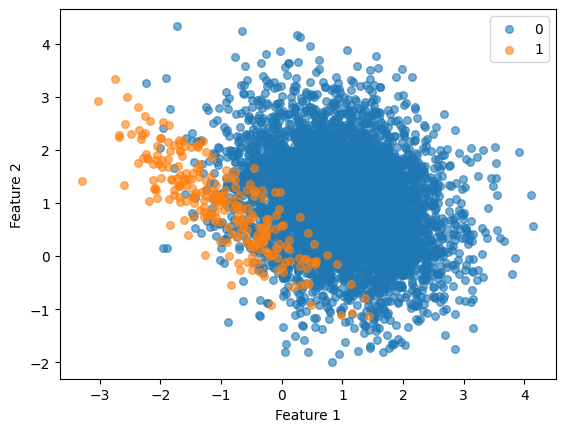

In [31]:
for label, _ in counter.items():
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label),alpha=0.6,s=30)
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

Counter({np.int64(0): 4750, np.int64(1): 4750})


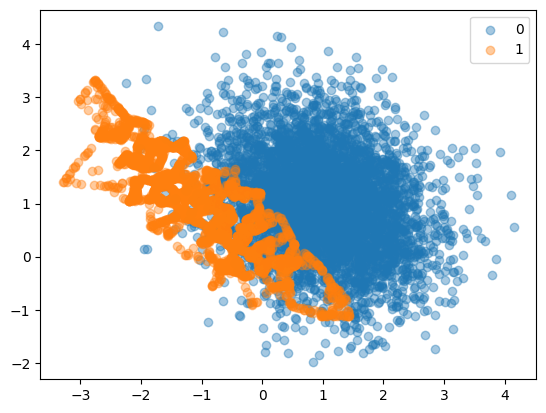

In [3]:
oversample = SMOTE()
Xs, ys = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(ys)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(ys == label)[0]
	plt.scatter(Xs[row_ix, 0], Xs[row_ix, 1], label=str(label),alpha=0.4)
plt.legend()
plt.show()

## Test different classifiers

Compare LogisticRegression vs SVC

<figure>
<center>
<img src='https://i.imgur.com/t9mrMcv.png'
width='1000px' height='550px' />
<figcaption>Summary of Quality Measures for Classification - Source: WiKi</figcaption></center>
</figure>

In [9]:
from sklearn.metrics import confusion_matrix as cm

In [12]:
model_LR = LogisticRegression(solver='lbfgs')
model_LR.fit(X,y)
print(CR(y,model_LR.predict(X)))
pd.DataFrame(cm(y,model_LR.predict(X)),columns=['0','1'],index=['0','1'])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      4750
           1       0.71      0.47      0.57       250

    accuracy                           0.96      5000
   macro avg       0.84      0.73      0.77      5000
weighted avg       0.96      0.96      0.96      5000



,0,1
0,4701,49
1,132,118


In [13]:
model_LR.fit(Xs,ys)
print(CR(y,model_LR.predict(X)))
pd.DataFrame(cm(y,model_LR.predict(X)),columns=['0','1'],index=['0','1'])

              precision    recall  f1-score   support

           0       1.00      0.90      0.95      4750
           1       0.34      0.93      0.50       250

    accuracy                           0.91      5000
   macro avg       0.67      0.92      0.72      5000
weighted avg       0.96      0.91      0.93      5000



,0,1
0,4295,455
1,18,232


In [46]:
model = SVC(kernel='rbf',gamma=0.1,C=10)
model.fit(Xs,ys)
print(CR(y,model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      0.89      0.94      4750
           1       0.31      0.95      0.47       250

    accuracy                           0.89      5000
   macro avg       0.65      0.92      0.70      5000
weighted avg       0.96      0.89      0.92      5000



## <font color='navy' size=6.5> Adaptive Synthetic Oversampling </font>

In [10]:
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

Counter({0: 9900, 1: 9899})


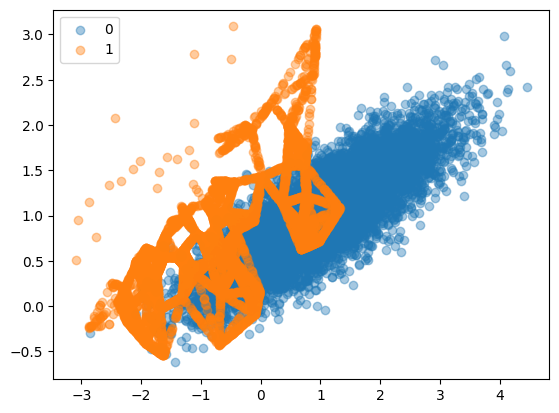

In [11]:
ada = ADASYN(random_state=42)
Xs, ys = ada.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(ys)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = np.where(ys == label)[0]
	plt.scatter(Xs[row_ix, 0], Xs[row_ix, 1], label=str(label),alpha=0.4)
plt.legend()
plt.show()

## <font color='navy' size=6.5> Real Data Application: Porto Seguro Safe Driver Detection </font>

In [2]:
data = pd.read_csv('drive/MyDrive/Data Sets/safe_driver_prediction.csv')

In [14]:
data

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595207,1488013,0,3,1,10,0,0,0,0,0,...,4,1,9,6,0,1,1,0,1,1
595208,1488016,0,5,1,3,0,0,0,0,0,...,4,1,3,8,1,0,1,0,1,1
595209,1488017,0,1,1,10,0,0,1,0,0,...,3,2,2,6,0,0,1,0,0,0
595210,1488021,0,5,2,3,1,0,0,0,1,...,4,1,4,2,0,1,1,1,0,0


In [15]:
# this is a class imbalanced problem
data.target.value_counts()

0    573518
1     21694
Name: target, dtype: int64

In [6]:
x = data.loc[:,'ps_ind_01':'ps_calc_20_bin'].values
y = data.target.values

In [3]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

In [4]:
scale = MinMaxScaler()

In [7]:
xscaled = scale.fit_transform(x)

In [20]:
model = LogisticRegression(solver='lbfgs',max_iter=10000)

In [27]:
model.fit(xscaled,y)
print(CR(y,model.predict(xscaled)))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    573518
           1       0.00      0.00      0.00     21694

    accuracy                           0.96    595212
   macro avg       0.48      0.50      0.49    595212
weighted avg       0.93      0.96      0.95    595212



In [28]:
model = KNeighborsClassifier(n_neighbors=5,weights='uniform')

In [ ]:
model.fit(xscaled,y)
print(CR(y,model.predict(xscaled)))

In [8]:
ada = ADASYN(random_state=123)
xs, ys = ada.fit_resample(x, y)

In [ ]:
model.fit(xs,ys)
print(CR(y,model.predict(x)))

              precision    recall  f1-score   support

           0       0.97      0.59      0.74    573518
           1       0.05      0.57      0.09     21694

    accuracy                           0.59    595212
   macro avg       0.51      0.58      0.42    595212
weighted avg       0.94      0.59      0.71    595212



## <font color='navy' size=6.5> Imbalanced Classification Example with Images

In [9]:
# References: Christos Aridas
#             Guillaume Lemaitre <g.lemaitre58@gmail.com>
# License: MIT
import numpy as np
from sklearn import datasets, neighbors
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import StratifiedKFold

from imblearn.over_sampling import ADASYN, SMOTE, RandomOverSampler
from imblearn.pipeline import make_pipeline

print(__doc__)

Automatically created module for IPython interactive environment


In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150
import matplotlib.pyplot as plt

In [11]:
LW = 2
RANDOM_STATE = 123


class DummySampler:

    def sample(self, X, y):
        return X, y

    def fit(self, X, y):
        return self

    def fit_resample(self, X, y):
        return self.sample(X, y)


cv = StratifiedKFold(n_splits=5,shuffle=True,random_state=123)

# Load the dataset
data = datasets.fetch_lfw_people()
majority_person = 1871  # 530 photos of George W Bush
minority_person = 531  # 29 photos of Bill Clinton
majority_idxs = np.flatnonzero(data.target == majority_person)
minority_idxs = np.flatnonzero(data.target == minority_person)
idxs = np.hstack((majority_idxs, minority_idxs))

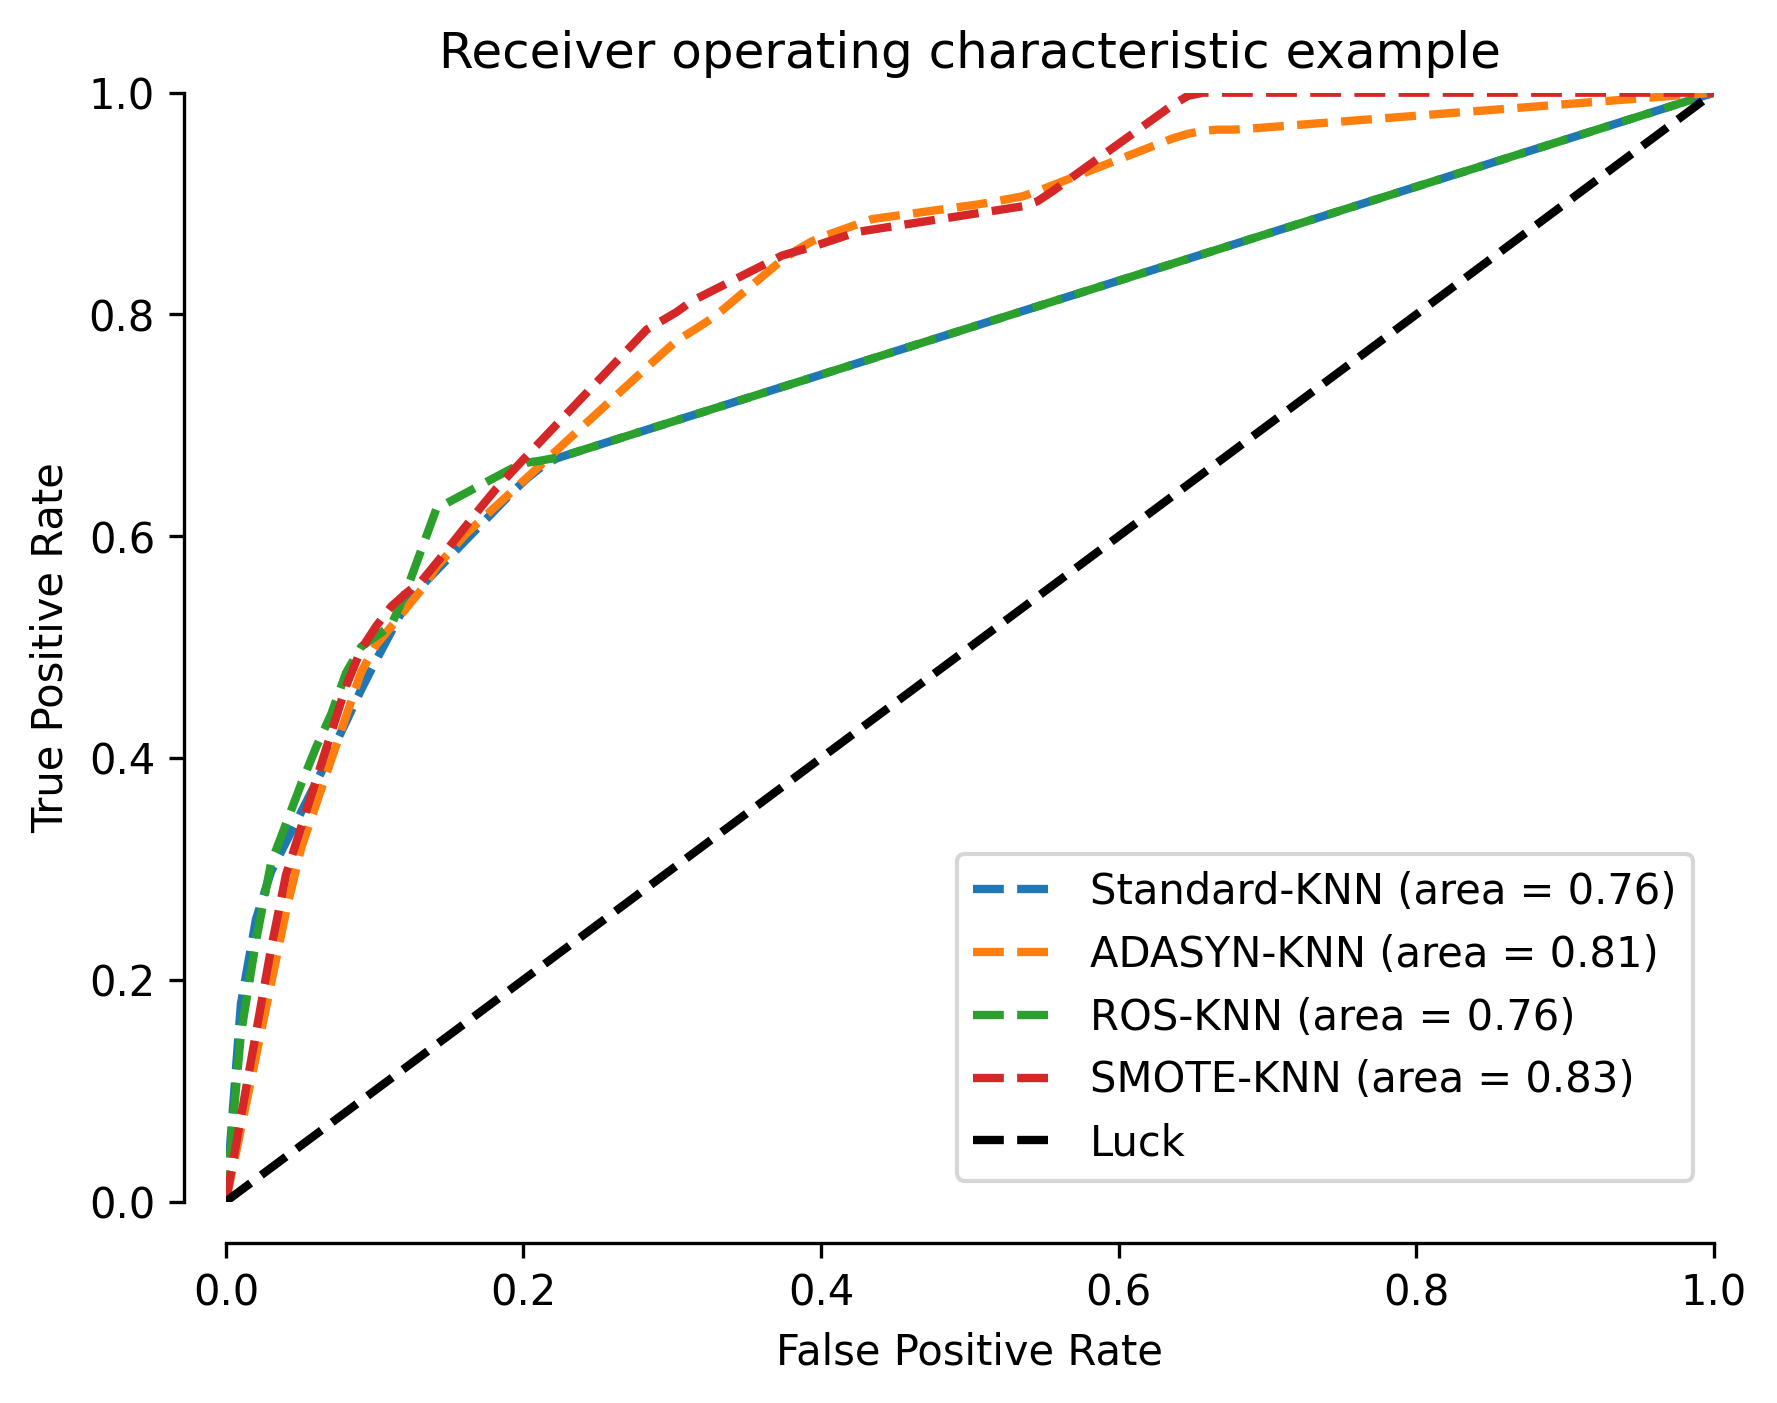

In [12]:
X = data.data[idxs]
y = data.target[idxs]
y[y == majority_person] = 0
y[y == minority_person] = 1

classifier = ['KNN', neighbors.KNeighborsClassifier(5)]

samplers = [
    ['Standard', DummySampler()],
    ['ADASYN', ADASYN(random_state=RANDOM_STATE)],
    ['ROS', RandomOverSampler(random_state=RANDOM_STATE)],
    ['SMOTE', SMOTE(random_state=RANDOM_STATE)],
]

pipelines = [
    ['{}-{}'.format(sampler[0], classifier[0]),
     make_pipeline(sampler[1], classifier[1])]
    for sampler in samplers
]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

for name, pipeline in pipelines:
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100)
    for train, test in cv.split(X, y):
        probas_ = pipeline.fit(X[train], y[train]).predict_proba(X[test])
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])
        mean_tpr += np.interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0
        roc_auc = auc(fpr, tpr)

    mean_tpr /= cv.get_n_splits(X, y)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    plt.plot(mean_fpr, mean_tpr, linestyle='--',
             label='{} (area = %0.2f)'.format(name) % mean_auc, lw=LW)

plt.plot([0, 1], [0, 1], linestyle='--', lw=LW, color='k',
         label='Luck')

# make nice plotting
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')

plt.legend(loc="lower right")

plt.show()

In [13]:
def plot_gallery(images, titles, h, w, n_row=4, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.85 * n_col, 2.5 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())


In [ ]:
len(test)

111

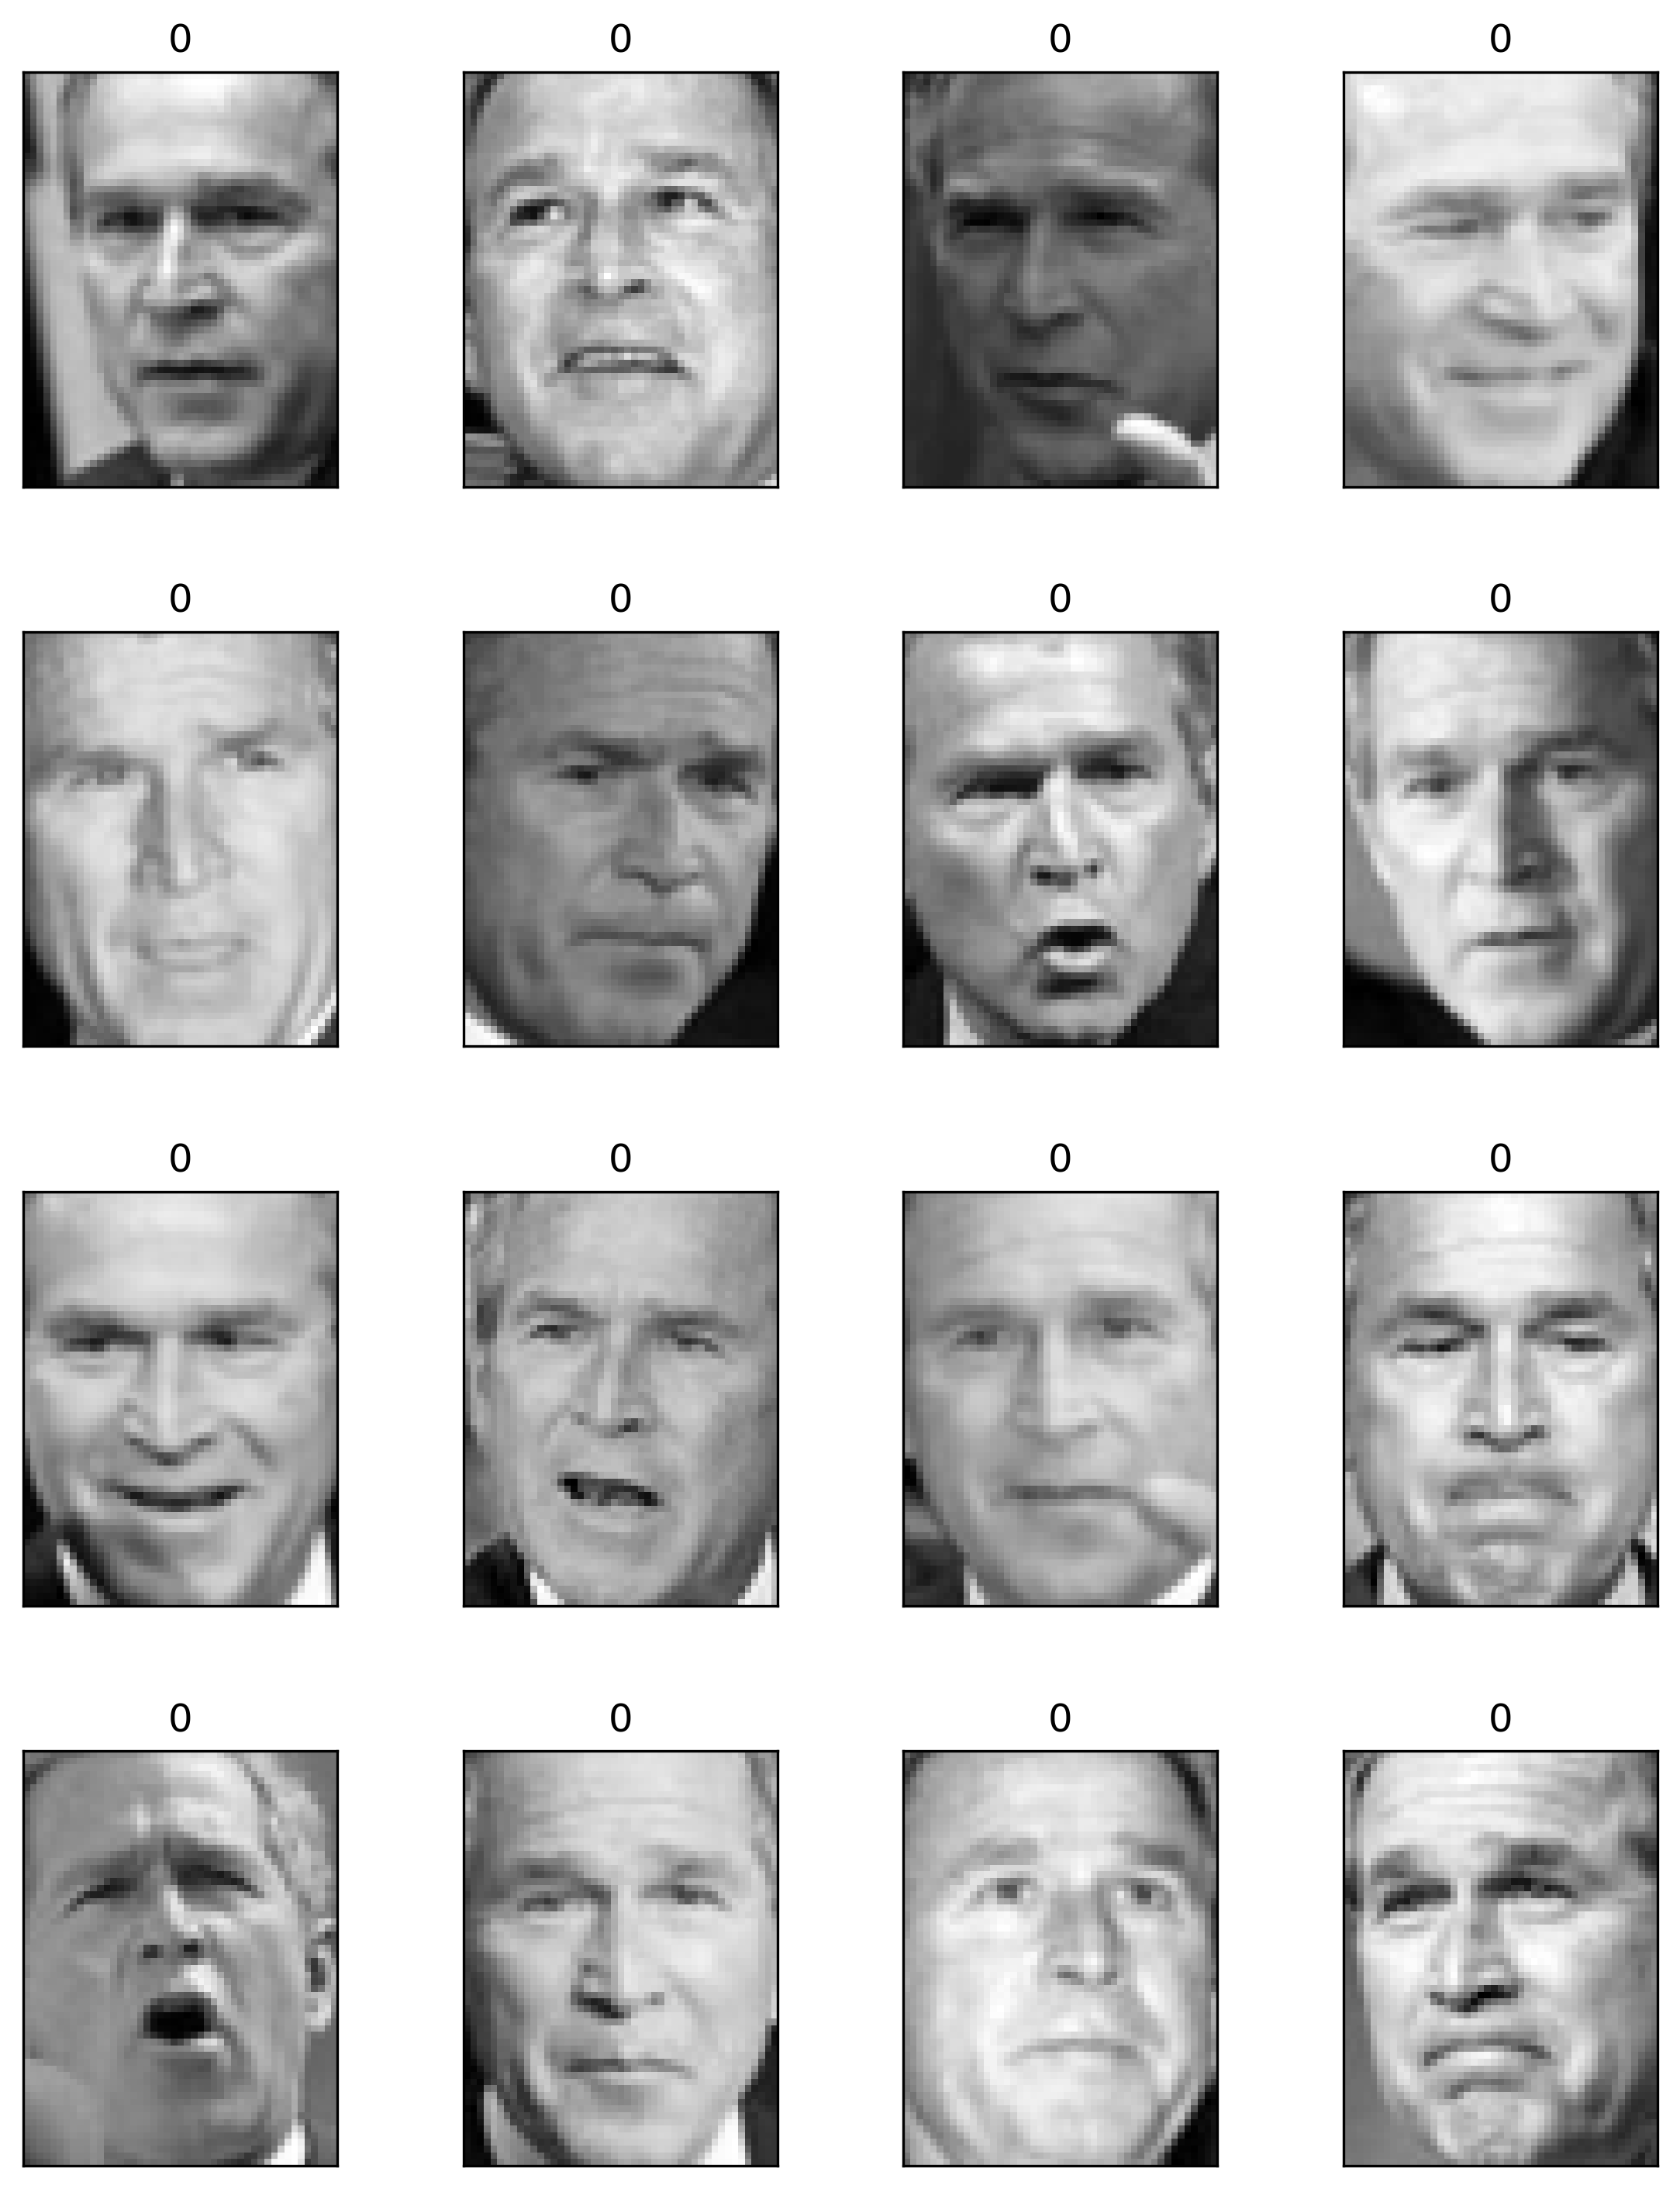

In [14]:
n_samples, h, w = data.images.shape
plot_gallery(X[:-29], y[:-29], h, w)

In [ ]:
test

array([424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
       450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
       463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
       476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
       489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501,
       502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513, 514,
       515, 516, 517, 518, 519, 520, 521, 522, 523, 524, 525, 526, 527,
       528, 529, 554, 555, 556, 557, 558])

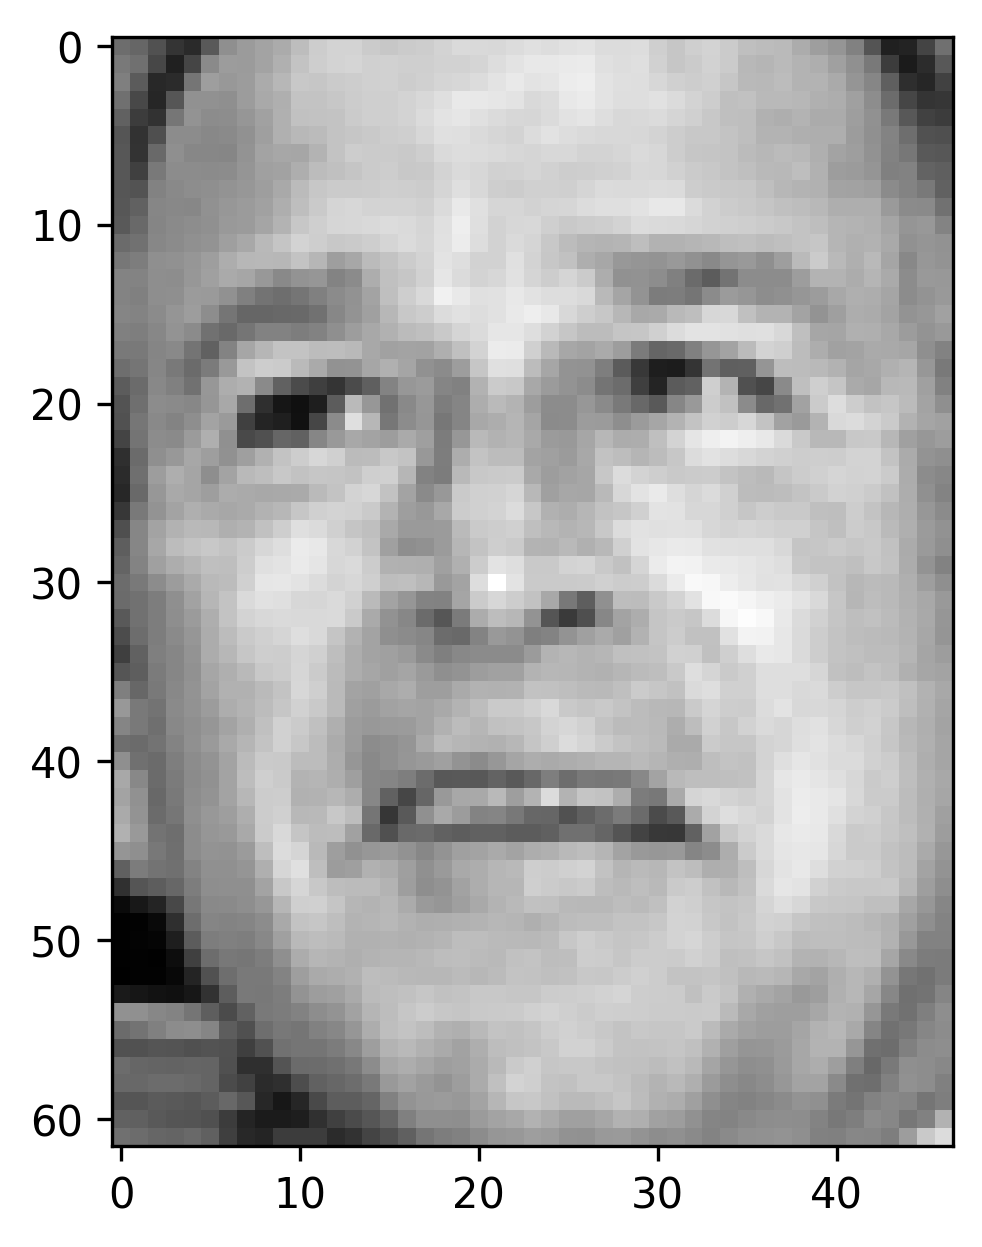

In [ ]:
plt.imshow(X[1].reshape((h, w)), cmap=plt.cm.gray)

In [ ]:
X[3].reshape((h, w)).shape

(62, 47)

In [15]:
from keras.models import Sequential # most of the time we design a "sequence" of layers
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
#from __future__ import print_function
import keras
# we import a lot of network design specific functions that we may need
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import LeakyReLU, ReLU
from keras.regularizers import l1, l2, l1_l2
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [ ]:
# improvements
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),input_shape=(h, w,1)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2))) # for downsizing the info from the features a bit
model.add(Dropout(0.25)) # to prevent having dead neurons
model.add(Conv2D(64, kernel_size=(3, 3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(200))
model.add(LeakyReLU(alpha=0.1))
model.add(Dense(1, activation='sigmoid'))
opt = Adam(learning_rate=0.002)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

In [ ]:
train_img = []
for x in X[train]:
  train_img.append(x.reshape(h,w,1))

In [ ]:
test_img = []
for x in X[test]:
  test_img.append(x.reshape(h,w,1))

In [ ]:
train_img = np.array(train_img).reshape(len(train_img),h,w,1)
test_img = np.array(test_img).reshape(len(test_img),h,w,1)

In [ ]:
model.fit(train_img, y[train], epochs=20, batch_size=50, validation_data=(test_img, y[test]),verbose=1)

Epoch 1/20
9/9 [==============================] - 5s 514ms/step - loss: 0.0350 - accuracy: 0.9866 - val_loss: 0.1025 - val_accuracy: 0.9550
Epoch 2/20
9/9 [==============================] - 5s 501ms/step - loss: 0.0270 - accuracy: 0.9888 - val_loss: 0.0725 - val_accuracy: 0.9730
Epoch 3/20
9/9 [==============================] - 2s 240ms/step - loss: 0.0328 - accuracy: 0.9911 - val_loss: 0.0926 - val_accuracy: 0.9459
Epoch 4/20
9/9 [==============================] - 2s 243ms/step - loss: 0.0192 - accuracy: 0.9955 - val_loss: 0.0901 - val_accuracy: 0.9550
Epoch 5/20
9/9 [==============================] - 2s 235ms/step - loss: 0.0400 - accuracy: 0.9866 - val_loss: 0.1740 - val_accuracy: 0.9640
Epoch 6/20
9/9 [==============================] - 3s 369ms/step - loss: 0.0496 - accuracy: 0.9844 - val_loss: 0.1009 - val_accuracy: 0.9640
Epoch 7/20
9/9 [==============================] - 2s 254ms/step - loss: 0.0551 - accuracy: 0.9821 - val_loss: 0.1017 - val_accuracy: 0.9550
Epoch 8/20
9/9 [====

In [ ]:
proba = model.predict(test_img)

4/4 [==============================] - 0s 75ms/step


In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y[test], proba)

In [ ]:
auc_keras = auc(fpr_keras, tpr_keras)

In [ ]:
auc_keras

0.9849056603773585